In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
supermarket_sales = pd.read_csv(r"C:\Users\ADMIN\Desktop\Amirul\Data Analyst Files\Project Portfolio\Supermarket sales\supermarket_sales - Sheet1.csv")

supermarket_sales 

,Invoice_ID,Branch,City,Customer type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
#total sales amount 
total_sales_amount = supermarket_sales['Total'].sum()

total_sales_amount

322966.749

In [22]:
# Total sales by branch
sales_by_branch = supermarket_sales.groupby('City')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

print(sales_by_branch)


        City        Total
1  Naypyitaw  110568.7065
2     Yangon  106200.3705
0   Mandalay  106197.6720


<Figure size 1000x500 with 0 Axes>

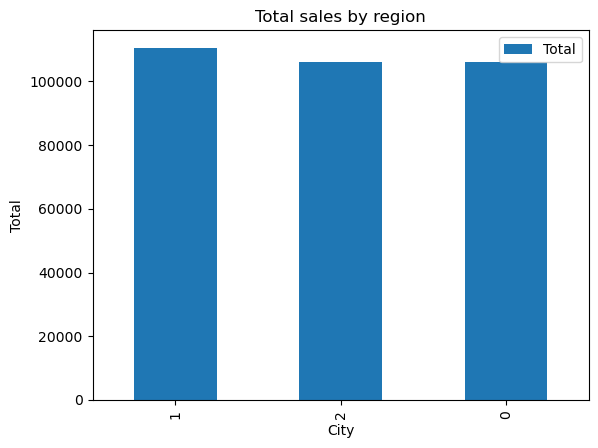

In [23]:
#plotting the sales by region

plt.figure(figsize=(10,5))

sales_by_branch.plot(kind='bar') 

plt.title('Total sales by region')

plt.xlabel('City')

plt.ylabel('Total')

plt.show()

In [11]:
#total sales by product
total_sales_by_product = supermarket_sales.groupby('Product_line')['Total'].sum().reset_index()

sorted_sales_product = total_sales_by_product.sort_values(by='Total', ascending=False)

sorted_sales_product

,Product_line,Total
2,Food and beverages,56144.8440
5,Sports and travel,55122.8265
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
3,Health and beauty,49193.7390


<Figure size 1000x500 with 0 Axes>

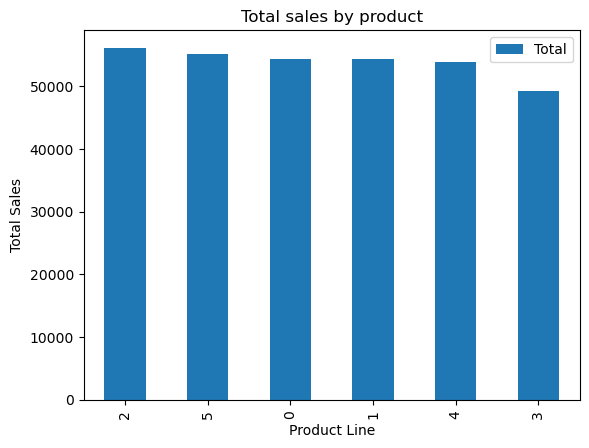

In [15]:
#plotting the sales by region

plt.figure(figsize=(10,5))

sorted_sales_product.plot(kind='bar') 

plt.title('Total sales by product')

plt.xlabel('Product Line')

plt.ylabel('Total Sales')

plt.show()

In [20]:
# Total sales by customer type
sales_by_customer_type = supermarket_sales.groupby('Customer type')['Total'].sum().reset_index()
print(sales_by_customer_type)


  Customer type       Total
0        Member  164223.444
1        Normal  158743.305


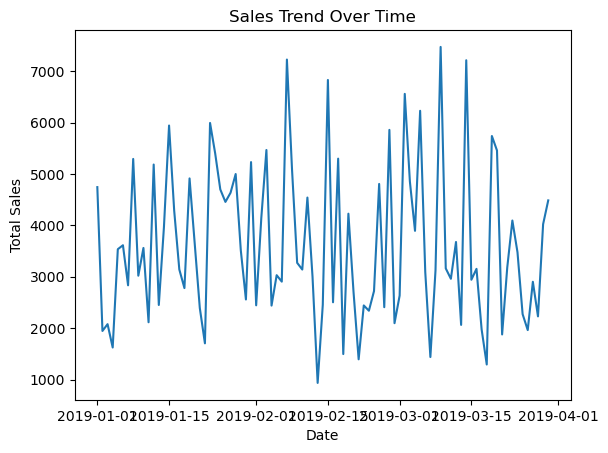

In [26]:
# Sales trend over time
# Convert 'Date' to datetime
supermarket_sales['Date'] = pd.to_datetime(supermarket_sales['Date'])

# Total sales by day
sales_by_day = supermarket_sales.groupby(supermarket_sales['Date'].dt.date)['Total'].sum().reset_index()

# Plot sales trend over time
import matplotlib.pyplot as plt

plt.plot(sales_by_day['Date'], sales_by_day['Total'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [27]:
# Customer segementation
# Segment customers by total spending
supermarket_sales['Spending_category'] = pd.cut(supermarket_sales['Total'], bins=[0, 100, 500, 1000, supermarket_sales['Total'].max()], labels=['Low', 'Medium', 'High', 'Very High'])

# Analyze distribution
spending_distribution = supermarket_sales['Spending_category'].value_counts().reset_index()
print(spending_distribution)


  Spending_category  count
0            Medium    565
1              High    218
2               Low    208
3         Very High      9


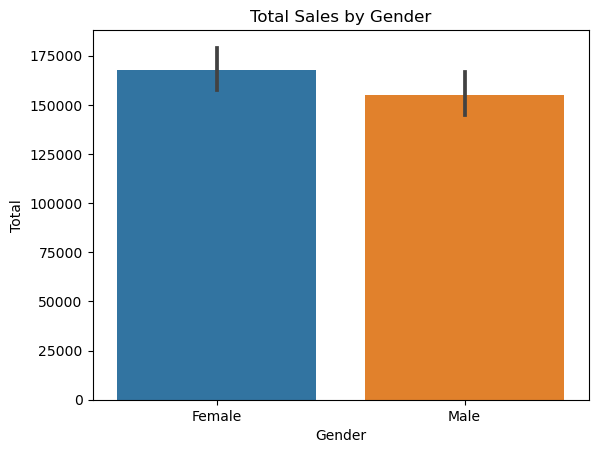

In [28]:
#Sales by gender visualization
import seaborn as sns

sns.barplot(x='Gender', y='Total', data=supermarket_sales, estimator=sum)
plt.title('Total Sales by Gender')
plt.show()


In [29]:
# Total sales by payment method
sales_by_payment_method = supermarket_sales.groupby('Payment')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

print(sales_by_payment_method)


       Payment       Total
0         Cash  112206.570
2      Ewallet  109993.107
1  Credit card  100767.072


Correlation between total sales and gross income: 1.0


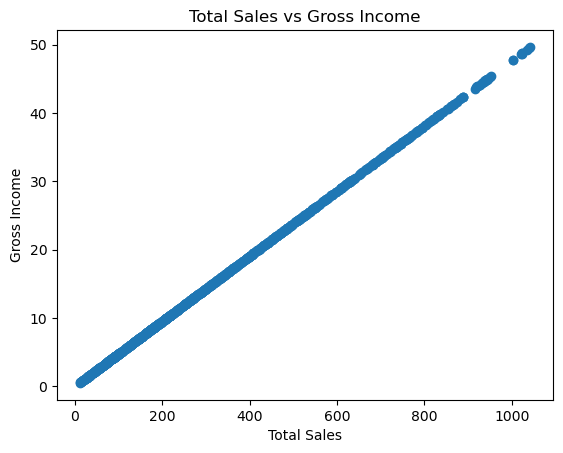

In [31]:
# Correlation between sales and gross income
correlation = supermarket_sales['Total'].corr(supermarket_sales['gross_income'])
print("Correlation between total sales and gross income:", correlation)

# Scatter plot of sales vs gross income
plt.scatter(supermarket_sales['Total'], supermarket_sales['gross_income'])
plt.title('Total Sales vs Gross Income')
plt.xlabel('Total Sales')
plt.ylabel('Gross Income')
plt.show()


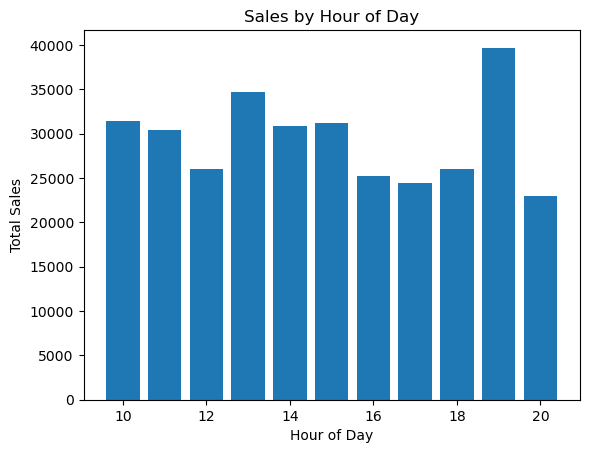

In [32]:
# Sales by hour of Day
# Convert 'Time' to datetime
supermarket_sales['Time'] = pd.to_datetime(supermarket_sales['Time'], format='%H:%M')

# Group sales by hour
supermarket_sales['Hour'] = supermarket_sales['Time'].dt.hour
sales_by_hour = supermarket_sales.groupby('Hour')['Total'].sum().reset_index()

# Plot sales by hour
plt.bar(sales_by_hour['Hour'], sales_by_hour['Total'])
plt.title('Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()
